## Dataset Exploration

In [2]:
import pandas as pd
import os, os.path 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

### Basics

A partir daqui conseguimos ter uma noção do tamanho do dataset como um todo, sabendo suas dimensões e colunas

In [3]:
dirAddress = 'dataset\garbage_classification'
indexFile = dirAddress + "\one-indexed-files.txt"

In [4]:
df = pd.read_csv(indexFile, header=None, names=['img', 'class'], sep='\s+')

In [5]:
df.head()

,img,class
0,glass1.jpg,1
1,glass2.jpg,1
2,glass3.jpg,1
3,glass4.jpg,1
4,glass5.jpg,1


In [6]:
df.shape

(2527, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     2527 non-null   object
 1   class   2527 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.6+ KB


In [8]:
print(df.max())
print("-----------")
print(df.min())


img      trash99.jpg
class              6
dtype: object
-----------
img      cardboard1.jpg
class                 1
dtype: object


### Histogram

A partir daqui podemos ver a distribuição da quantidade de imagens, no dataset como um todo cara cada classe, mais para frente veremos a distribuição para treinamento, validação e teste também

In [9]:
def label_class(row):
    if row['class'] == 1:
        return 'glass'
    elif row['class'] == 2:
        return 'paper'
    elif row['class'] == 3:
        return 'cardboard'
    elif row['class'] == 4:
        return 'plastic'
    elif row['class'] == 5:
        return 'metal'
    else:
        return 'thrash'

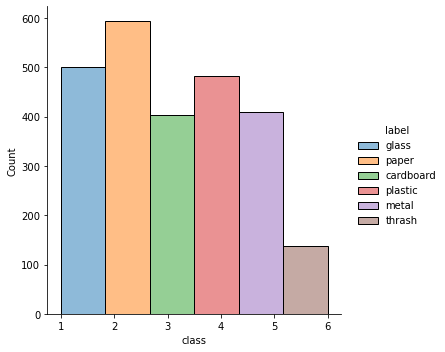

In [10]:
df['label'] = df.apply (lambda row: label_class(row), axis=1)
sns.displot(data=df, kind='hist', x="class", hue="label", palette="tab10", legend=True,  bins=6)

In [12]:
df.set_index(["label", "img"]).count(level="label")

,class
label,
cardboard,403
glass,501
metal,410
paper,594
plastic,482
thrash,137


As imagens para treinamento, validação e teste já vem com um arquivo de indice indicando quais imagens pertencem ao conjunto, à baixo temos uma visualização de como são esses conjuntos e principalmente, podemos ter a noção que será necessário fazer balanceamento entre as classes uma vez que as contagens entre elas divergem consideravelmente

### Training Set

In [37]:
trainFile = dirAddress + "\one-indexed-files-notrash_train.txt"
dfTrain =  pd.read_csv(trainFile, header=None, names=['img', 'class'], sep='\s+')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     1768 non-null   object
 1   class   1768 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.8+ KB


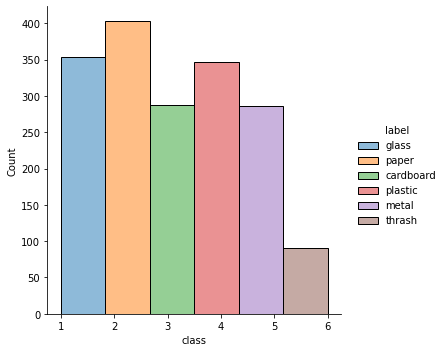

In [48]:
dfTrain['label'] = dfTrain.apply (lambda row: label_class(row), axis=1)
hue_order = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'thrash']
sns.displot(data=dfTrain, kind='hist', x="class", hue="label", palette="tab10", hue_order=hue_order, legend=True,  bins=6)

### Validation Set

In [39]:
valFile = dirAddress + "\one-indexed-files-notrash_val.txt"
dfVal =  pd.read_csv(valFile, header=None, names=['img', 'class'], sep='\s+')
dfVal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     328 non-null    object
 1   class   328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


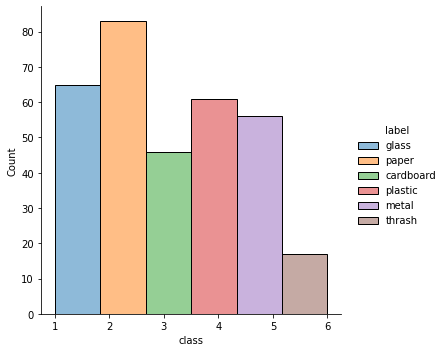

In [49]:
dfVal['label'] = dfVal.apply (lambda row: label_class(row), axis=1)
hue_order = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'thrash']
sns.displot(data=dfVal, kind='hist', x="class", hue="label", palette="tab10", hue_order=hue_order, legend=True,  bins=6)

### Test Set

In [50]:
testFile = dirAddress + "\one-indexed-files-notrash_test.txt"
dfTest =  pd.read_csv(valFile, header=None, names=['img', 'class'], sep='\s+')
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     328 non-null    object
 1   class   328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


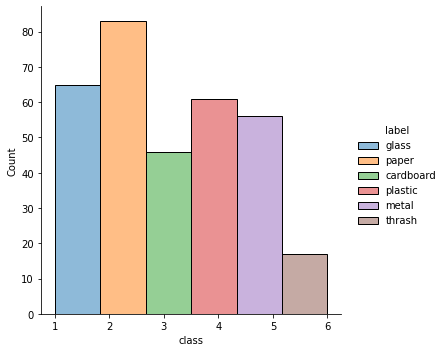

In [52]:
dfTest['label'] = dfTest.apply (lambda row: label_class(row), axis=1)
hue_order = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'thrash']
sns.displot(data=dfTest, kind='hist', x="class", hue="label", palette="tab10", hue_order=hue_order, legend=True,  bins=6)